<a href="https://colab.research.google.com/github/pratikghodke777/Hotel-Booking-Analysis---Capstone-Project-/blob/main/Hotel_Booking_Analysis_Capstone_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> Have you ever wondered when the besttime of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

# <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

# <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

---



---

## ✈

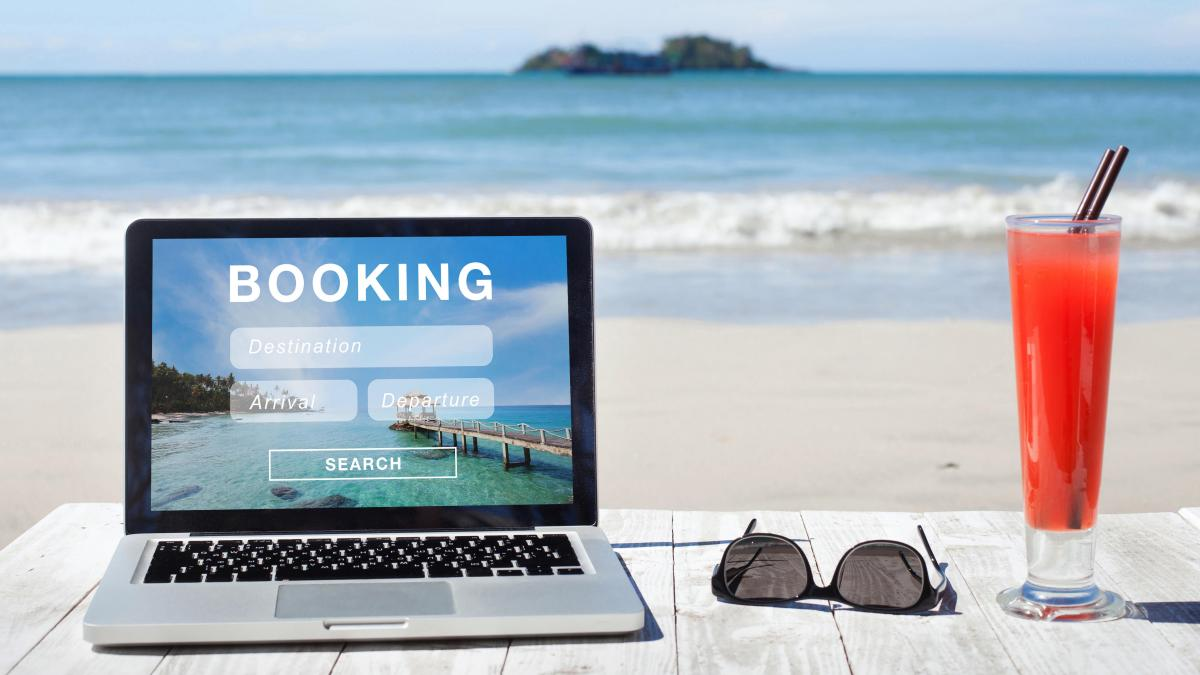

# **Importing Libraries**

In [ ]:
# importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Mounting Drive to featch Data set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Assign file location (.CSV file)**

In [ ]:
File_location="/content/drive/MyDrive/Capston projects/Hotel booking Analysis/Hotel Bookings.csv"
DF=pd.read_csv(File_location)

# **Data information about data set**



> **Cheacking first five rows**





In [ ]:
DF.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03






> min, max values,mean values etc.







In [ ]:
DF.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


# **Data Description:**

**1.hotel :** Hotel(Resort Hotel or City Hotel)

**2.is_canceled :**Value indicating if the booking was canceled (1) or not (0)

**3.lead_time :**Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

**4.arrival_date_year :** Year of arrival date

**5.arrival_date_month :** Month of arrival date

**6.arrival_date_week_number :**Week number of year for arrival date

**7.arrival_date_day_of_month :** Day of arrival date

**8.stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**9.stays_in_week_nights :** Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**10.adults :** Number of adults

**11.children :**Number of children

**12.babies :** Number of babies

**13.meal :**Type of meal booked. Categories are presented in standard hospitality meal packages:

**14.country :** Country of origin.`

**15.market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**16.Distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

**17.is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0)

**18.previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

**19.previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

**20.reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**21.assigned_room_type :** Code for the type of room assigned to the booking.

**22.booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

**23.deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**24.agent :** ID of the travel agency that made the booking

**25.company :** ID of the company/entity that made the booking or responsible for paying the booking.

**26.days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer

**27.customer_type :** Type of booking, assuming one of four categories

**28.adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**29.required_car_parking_spaces :** Number of car parking spaces required by the customer

**30.total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor)

**31.reservation_status :** Reservation last status, assuming one of three categories

 * Canceled – booking was canceled by the customer
 * Check-Out – customer has checked in but already departed
 * No-Show – customer did not check-in and did inform the hotel of the reason   whyList item




# **Data Cleaning**


# **> checking for the duplicate rows**



In [ ]:
DF.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
dtype: int64



> Indented block



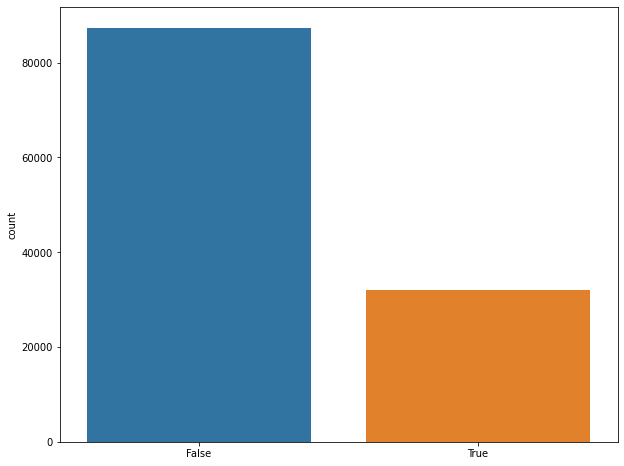

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=DF.duplicated())


> So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

> dropping the duplicate rows



In [ ]:
DF= DF.drop_duplicates()



> data set reduced



In [ ]:
DF.shape #data set reduced

(87396, 32)



## > **Checking for Null Values**



In [ ]:
DF.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


# **So we Have Null values in columns- Company, agent, Country,children.**

**1.for company and agent I will fill the Missing values with Zero (0)**

**2.for country we will fill Missing values with boject 'others'.**

**3.AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.** 

In [ ]:
null_columns=['agent','children','company']
for col in null_columns:
  DF[col].fillna(0,inplace=True)                   # Filling/replacing null values with 0.

  DF['country'].fillna('others',inplace=True)     # Replacing NA values with 'others'

DF.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


# **EDA (Exploratory Data Analysis)**